In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Capital Bike Share DataFrames
df = pd.read_csv('last_week.csv')

In [3]:
# Checking the no. of rows and columns in the given DataFrames
df.shape

(57934, 14)

In [4]:
# Checking empty cells in the columns for DataFrames
df.isnull().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name    4991
start_station_id      4991
end_station_name      5422
end_station_id        5422
start_lat                0
start_lng                0
end_lat                 86
end_lng                 86
member_casual            0
day                      0
dtype: int64

In [5]:
# Droping empty rows from the DataFrame
df= df.dropna()

In [6]:
# Top 5 (by default) for DataFrame with capacity information
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day
0,B3FA23181ADC06FE,docked_bike,2021-06-25 00:51:53,2021-06-25 01:51:40,Georgia Ave & Spring St,32035.0,New Hampshire & Kirklynn Ave,32061.0,38.999388,-77.031555,38.988101,-76.988422,casual,2021-06-25
1,6A153F2AD6700EE1,classic_bike,2021-06-22 06:28:23,2021-06-22 06:33:19,Merrifield Cinema & Merrifield Town Center,32235.0,Merrilee Dr & Lauren Elizabeth Lane,32234.0,38.870093,-77.229970,38.879355,-77.230681,casual,2021-06-22
2,7265E4C759F1EDC0,classic_bike,2021-06-22 22:27:28,2021-06-22 22:30:39,Columbia & Ontario Rd NW,31296.0,15th & Harvard St NW,31103.0,38.924088,-77.040787,38.926124,-77.035421,member,2021-06-22
3,18FB278BE5F2B0C7,docked_bike,2021-06-26 20:49:57,2021-06-26 22:44:29,1st & H St NW,31638.0,1st & H St NW,31638.0,38.900358,-77.012108,38.900358,-77.012108,casual,2021-06-26
4,294E78FE02E1C65F,classic_bike,2021-06-22 20:35:41,2021-06-22 20:45:27,5th & K St NW,31600.0,17th St & Massachusetts Ave NW,31267.0,38.903040,-77.019027,38.908142,-77.038359,member,2021-06-22


In [7]:
# Checking Data Type for the given DataFrames
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
day                    object
dtype: object

In [8]:
# Checking Data Type for the given DataFrames
type(df['started_at'][0])

str

In [9]:
# Convertion 'object' data type for 'started_at' and 'ended_at' columns to Timestamp/datetime64
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [10]:
# Checking converted data type
type(df['started_at'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
# Set one of the column of dataframe as index using .index function
# Setting 'started_at' column as index
df.index = df['started_at']
df.index

DatetimeIndex(['2021-06-25 00:51:53', '2021-06-22 06:28:23',
               '2021-06-22 22:27:28', '2021-06-26 20:49:57',
               '2021-06-22 20:35:41', '2021-06-26 10:46:29',
               '2021-06-21 21:36:19', '2021-06-22 20:03:32',
               '2021-06-26 12:56:49', '2021-06-21 16:33:50',
               ...
               '2021-06-26 17:15:27', '2021-06-24 09:56:27',
               '2021-06-26 14:58:17', '2021-06-23 21:02:32',
               '2021-06-25 12:28:37', '2021-06-23 11:48:10',
               '2021-06-25 00:07:51', '2021-06-25 17:44:53',
               '2021-06-25 17:43:45', '2021-06-21 20:00:18'],
              dtype='datetime64[ns]', name='started_at', length=50625, freq=None)

In [12]:
# Reference: https://stackoverflow.com/questions/51938140/how-to-get-the-time-duration-from-two-date-time-columns-of-pandas-dataframe
# Option-1: Finding the duration of trip.

#df['duration_min'] = (df['ended_at']-df['started_at']).apply(lambda x: x.seconds/(60))

In [13]:
# Option-2: Finding the duration of trip. Using Numpy 'timedelta64' function. 
# Reference: https://numpy.org/doc/stable/reference/arrays.datetime.html

df['duration_hr'] = (df['ended_at']-df['started_at'])/np.timedelta64(1,'h')
df['duration_hr'] = df['duration_hr'].round(2)


In [14]:
df = df.sort_index()
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day,duration_hr
started_at,,,,,,,,,,,,,,,
2021-06-21 00:03:31,0931020CA99DDDFD,electric_bike,2021-06-21 00:03:31,2021-06-21 00:51:47,M St & New Jersey Ave SE,31208.0,Columbia Rd & Belmont St NW,31113.0,38.876379,-77.003725,38.920646,-77.043541,casual,2021-06-21,0.80
2021-06-21 00:03:45,5FA282CD9203E4FD,classic_bike,2021-06-21 00:03:45,2021-06-21 00:22:24,15th St & Constitution Ave NW,31321.0,15th & W St NW,31125.0,38.892244,-77.033234,38.919018,-77.034449,member,2021-06-21,0.31
2021-06-21 00:04:05,4D5A3796796C3DE5,classic_bike,2021-06-21 00:04:05,2021-06-21 00:15:56,Georgetown Harbor / 30th St NW,31215.0,15th & L St NW,31276.0,38.902314,-77.059142,38.903649,-77.034918,casual,2021-06-21,0.20
2021-06-21 00:04:12,8C934856B972A8A1,classic_bike,2021-06-21 00:04:12,2021-06-21 00:14:04,15th St & Constitution Ave NW,31321.0,Jefferson Dr & 14th St SW,31247.0,38.892244,-77.033234,38.888553,-77.032427,casual,2021-06-21,0.16
2021-06-21 00:05:21,145F43324B2D30B9,classic_bike,2021-06-21 00:05:21,2021-06-21 00:12:55,3rd & Tingey St SE,31634.0,4th & E St SW,31244.0,38.875010,-77.002400,38.884120,-77.017445,member,2021-06-21,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26 23:59:05,8FD3D47BBE46EB6A,classic_bike,2021-06-26 23:59:05,2021-06-27 00:09:18,11th & Kenyon St NW,31102.0,14th & Belmont St NW,31119.0,38.929464,-77.027822,38.921074,-77.031887,casual,2021-06-26,0.17
2021-06-26 23:59:17,209B1878B4CF750A,classic_bike,2021-06-26 23:59:17,2021-06-27 00:22:25,7th & T St NW,31109.0,22nd & H St NW,31127.0,38.915500,-77.022200,38.898925,-77.048852,casual,2021-06-26,0.39
2021-06-26 23:59:22,6B2425E9DCD624F9,classic_bike,2021-06-26 23:59:22,2021-06-27 00:18:58,17th & Corcoran St NW,31214.0,New Hampshire Ave & T St NW,31229.0,38.912100,-77.038700,38.915544,-77.038252,member,2021-06-26,0.33


In [15]:
# Sorting the values according to the date

#df.sort_values(by=['duration_hr'], ascending=False)

In [16]:
# Slice data for specific day/time using index column
df.loc['2021-06-25']

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day,duration_hr
started_at,,,,,,,,,,,,,,,
2021-06-25 00:00:04,C1D274263AF16C2B,electric_bike,2021-06-25 00:00:04,2021-06-25 00:18:22,15th & Harvard St NW,31103.0,Hamlin & 7th St NE,31514.0,38.926126,-77.035478,38.927415,-76.997304,member,2021-06-25,0.30
2021-06-25 00:00:13,66D385B6B37981EC,classic_bike,2021-06-25 00:00:13,2021-06-25 00:37:06,10th & K St NW,31263.0,10th & K St NW,31263.0,38.902400,-77.026220,38.902400,-77.026220,casual,2021-06-25,0.61
2021-06-25 00:00:16,4647D752ACBCCA9D,classic_bike,2021-06-25 00:00:16,2021-06-25 00:37:00,10th & K St NW,31263.0,10th & K St NW,31263.0,38.902400,-77.026220,38.902400,-77.026220,casual,2021-06-25,0.61
2021-06-25 00:00:16,D9B5282AC2A5BC6A,classic_bike,2021-06-25 00:00:16,2021-06-25 00:47:06,Massachusetts Ave & Dupont Circle NW,31200.0,Connecticut & Nebraska Ave NW,31310.0,38.910100,-77.044400,38.955016,-77.069956,casual,2021-06-25,0.78
2021-06-25 00:00:31,414092418063E5A5,classic_bike,2021-06-25 00:00:31,2021-06-25 00:08:45,14th & Rhode Island Ave NW,31203.0,New Jersey Ave & R St NW,31509.0,38.908600,-77.032300,38.912659,-77.017669,casual,2021-06-25,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25 23:58:53,AC2F9002CF4AE4A7,classic_bike,2021-06-25 23:58:53,2021-06-26 00:03:47,7th & T St NW,31109.0,Convention Center / 7th & M St NW,31223.0,38.915500,-77.022200,38.905737,-77.022270,casual,2021-06-25,0.08
2021-06-25 23:59:06,996BCB7A0B7CECB0,classic_bike,2021-06-25 23:59:06,2021-06-26 00:31:26,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,15th St & Constitution Ave NW,31321.0,38.888774,-77.028694,38.892244,-77.033234,member,2021-06-25,0.54
2021-06-25 23:59:44,9C5219D8AAEC6DC6,classic_bike,2021-06-25 23:59:44,2021-06-26 00:18:57,New Hampshire Ave & T St NW,31229.0,Park Rd & Holmead Pl NW,31602.0,38.915544,-77.038252,38.930800,-77.031500,casual,2021-06-25,0.32


In [17]:
# Counting the no. of rides for the busiest stations
df.loc['2021-06-22' : '2021-06-22'].groupby('start_station_name').count()['rideable_type'].sort_values(ascending=False)

start_station_name
15th & P St NW                     60
New Hampshire Ave & T St NW        59
17th & Corcoran St NW              58
Thomas Circle                      58
Columbus Circle / Union Station    57
                                   ..
Pleasant St & MLK Ave SE            1
East West Hwy & 16th St             1
Pennsylvania & Minnesota Ave SE     1
Oxon Hill Park & Ride               1
Yuma St & Tenley Circle NW          1
Name: rideable_type, Length: 499, dtype: int64

<AxesSubplot:xlabel='start_station_name'>

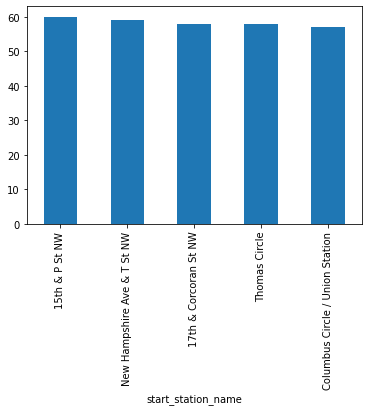

In [18]:
# Plotting no. of rides for 5 stations
df.loc['2021-06-22' : '2021-06-22'].groupby(['start_station_name']).count()['rideable_type'].sort_values(ascending=False)[:5].plot(kind='bar')

In [19]:
# Slicing for the time duration
# Limitation: Only applicable to the same day. If the day is not the same than it will take the values out of the desired time duration

df.loc['2021-06-21 10:00:00' : '2021-06-21 12:00:00',:]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day,duration_hr
started_at,,,,,,,,,,,,,,,
2021-06-21 10:00:01,22FF9ED7AF688915,classic_bike,2021-06-21 10:00:01,2021-06-21 10:07:41,New Hampshire Ave & Ward Pl NW,31212.0,17th & G St NW,31277.0,38.905711,-77.047318,38.898283,-77.039732,member,2021-06-21,0.13
2021-06-21 10:00:25,BF0F539902A3BCEC,classic_bike,2021-06-21 10:00:25,2021-06-21 10:10:04,4th & M St SE,31652.0,11th & C St SE,31659.0,38.876751,-77.000736,38.885908,-76.991476,member,2021-06-21,0.16
2021-06-21 10:00:34,F5C90ABBA46FA230,classic_bike,2021-06-21 10:00:34,2021-06-21 10:31:57,4th St & Madison Dr NW,31288.0,19th St & Constitution Ave NW,31235.0,38.890496,-77.017246,38.892300,-77.043600,casual,2021-06-21,0.52
2021-06-21 10:01:21,09C64FC0FF46806B,classic_bike,2021-06-21 10:01:21,2021-06-21 10:09:08,Constitution Ave & 2nd St NW/DOL,31271.0,1st & O St NW,31519.0,38.892275,-77.013917,38.908643,-77.012365,member,2021-06-21,0.13
2021-06-21 10:01:21,E81DCA4ED34B8E3B,classic_bike,2021-06-21 10:01:21,2021-06-21 13:29:01,State Theatre / Park Pl & N Washington St,32601.0,Pennsylvania Ave & Park Ave,32603.0,38.882746,-77.170032,38.887403,-77.176992,casual,2021-06-21,3.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-21 11:58:02,B2BBEED5375ED7E0,classic_bike,2021-06-21 11:58:02,2021-06-21 12:02:49,7th St & Massachusetts Ave NE,31647.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.892220,-76.996020,38.884095,-76.995234,member,2021-06-21,0.08
2021-06-21 11:58:51,D0E34307CC32D9CE,docked_bike,2021-06-21 11:58:51,2021-06-21 12:43:50,4th St & Madison Dr NW,31288.0,4th St & Madison Dr NW,31288.0,38.890496,-77.017247,38.890496,-77.017247,casual,2021-06-21,0.75
2021-06-21 11:59:00,57AA97AA5F3D6684,classic_bike,2021-06-21 11:59:00,2021-06-21 11:59:17,18th & New Hampshire Ave NW,31324.0,18th & New Hampshire Ave NW,31324.0,38.911268,-77.041829,38.911268,-77.041829,member,2021-06-21,0.00


In [20]:
# Adding columns for hour and day name in DataFrame

df.loc[:,'hour'] = df['started_at'].dt.hour
df.loc[:,'DAY'] = df['started_at'].dt.day
df.loc[:,'weekday'] = df['started_at'].dt.day_name()

In [21]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day,duration_hr,hour,DAY,weekday
started_at,,,,,,,,,,,,,,,,,,
2021-06-21 00:03:31,0931020CA99DDDFD,electric_bike,2021-06-21 00:03:31,2021-06-21 00:51:47,M St & New Jersey Ave SE,31208.0,Columbia Rd & Belmont St NW,31113.0,38.876379,-77.003725,38.920646,-77.043541,casual,2021-06-21,0.80,0,21,Monday
2021-06-21 00:03:45,5FA282CD9203E4FD,classic_bike,2021-06-21 00:03:45,2021-06-21 00:22:24,15th St & Constitution Ave NW,31321.0,15th & W St NW,31125.0,38.892244,-77.033234,38.919018,-77.034449,member,2021-06-21,0.31,0,21,Monday
2021-06-21 00:04:05,4D5A3796796C3DE5,classic_bike,2021-06-21 00:04:05,2021-06-21 00:15:56,Georgetown Harbor / 30th St NW,31215.0,15th & L St NW,31276.0,38.902314,-77.059142,38.903649,-77.034918,casual,2021-06-21,0.20,0,21,Monday
2021-06-21 00:04:12,8C934856B972A8A1,classic_bike,2021-06-21 00:04:12,2021-06-21 00:14:04,15th St & Constitution Ave NW,31321.0,Jefferson Dr & 14th St SW,31247.0,38.892244,-77.033234,38.888553,-77.032427,casual,2021-06-21,0.16,0,21,Monday
2021-06-21 00:05:21,145F43324B2D30B9,classic_bike,2021-06-21 00:05:21,2021-06-21 00:12:55,3rd & Tingey St SE,31634.0,4th & E St SW,31244.0,38.875010,-77.002400,38.884120,-77.017445,member,2021-06-21,0.13,0,21,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26 23:59:05,8FD3D47BBE46EB6A,classic_bike,2021-06-26 23:59:05,2021-06-27 00:09:18,11th & Kenyon St NW,31102.0,14th & Belmont St NW,31119.0,38.929464,-77.027822,38.921074,-77.031887,casual,2021-06-26,0.17,23,26,Saturday
2021-06-26 23:59:17,209B1878B4CF750A,classic_bike,2021-06-26 23:59:17,2021-06-27 00:22:25,7th & T St NW,31109.0,22nd & H St NW,31127.0,38.915500,-77.022200,38.898925,-77.048852,casual,2021-06-26,0.39,23,26,Saturday
2021-06-26 23:59:22,6B2425E9DCD624F9,classic_bike,2021-06-26 23:59:22,2021-06-27 00:18:58,17th & Corcoran St NW,31214.0,New Hampshire Ave & T St NW,31229.0,38.912100,-77.038700,38.915544,-77.038252,member,2021-06-26,0.33,23,26,Saturday


<AxesSubplot:xlabel='hour', ylabel='ride_id'>

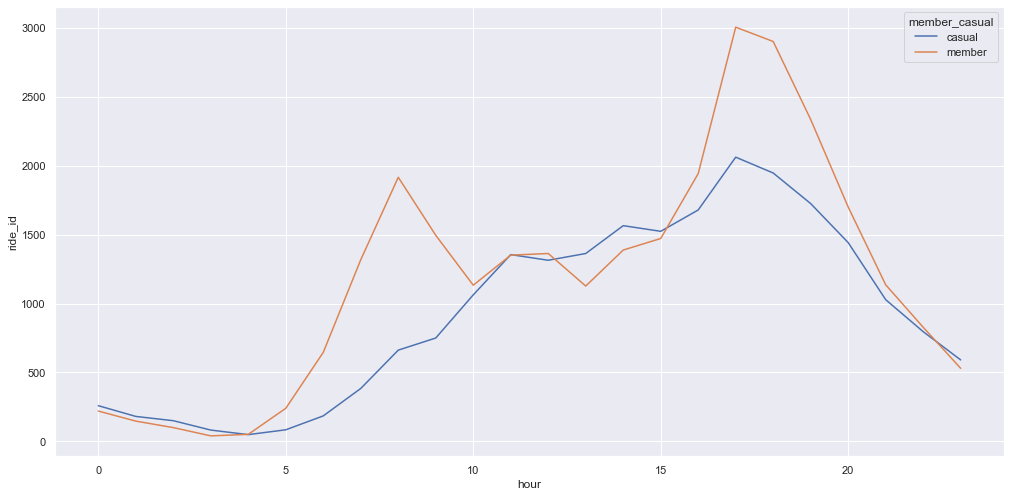

In [22]:
# Plotting Bike rides vs time for members and casual users

sns.set(rc={'figure.figsize':(17.0,8.27)})

df_mem_cal = df.groupby(['hour', 'member_casual']).count()['ride_id'].reset_index()

sns.lineplot(data= df_mem_cal, x='hour', y='ride_id', hue='member_casual')

<AxesSubplot:xlabel='hour', ylabel='ride_id'>

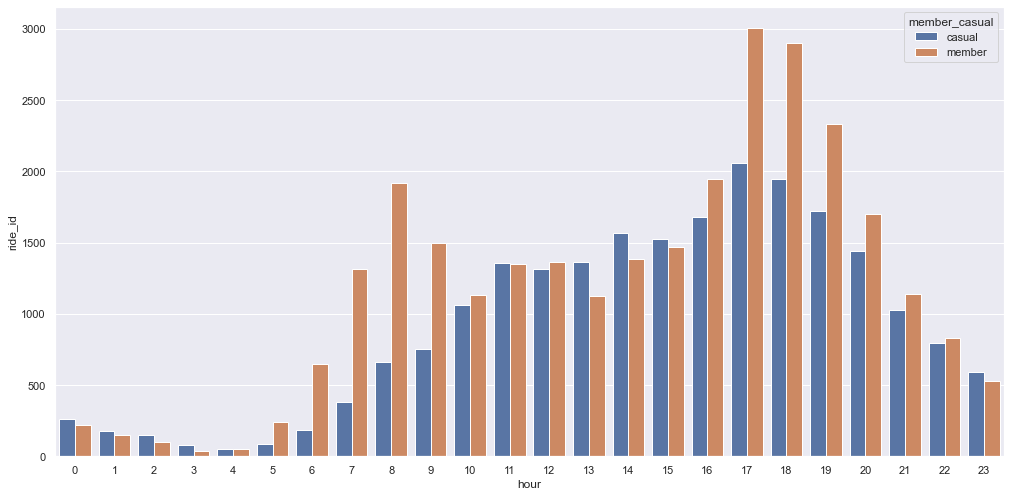

In [23]:
sns.barplot(x='hour', y='ride_id', data=df_mem_cal, hue='member_casual', dodge=True)

<AxesSubplot:xlabel='weekday', ylabel='count'>

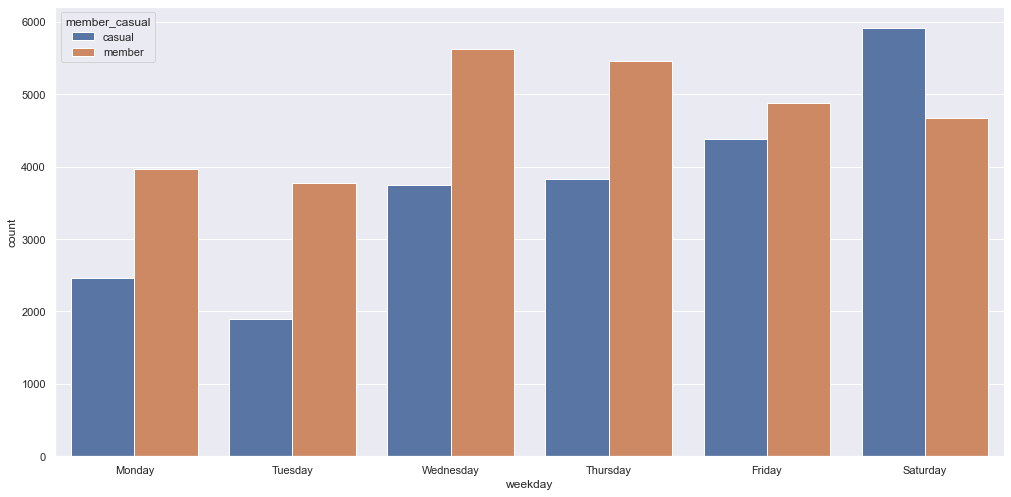

In [24]:
# Weekday vs number of rides for members and casual users

sns.countplot(x='weekday', data=df, hue='member_casual', dodge=True)

<AxesSubplot:xlabel='hour', ylabel='ride_id'>

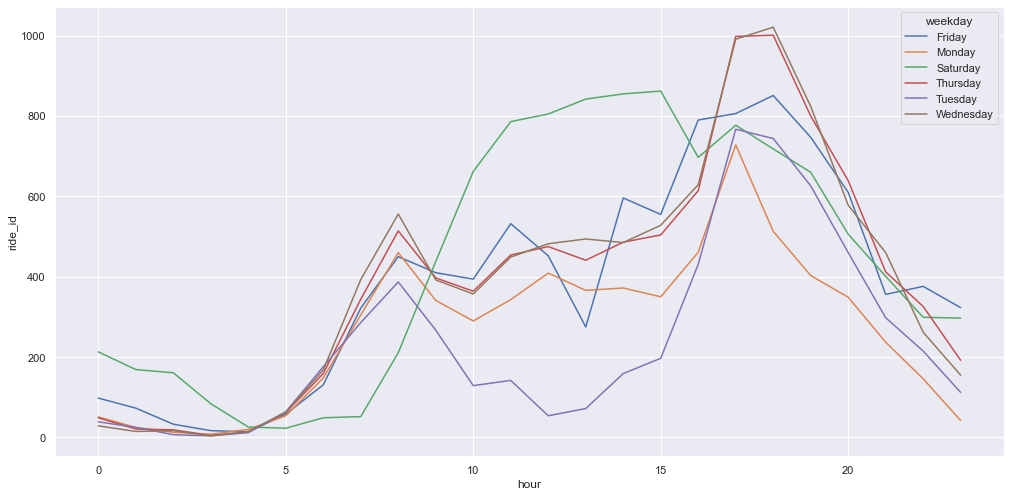

In [25]:
# No. of rides vs total no. of rides for weekdays
df_wk = df.groupby(['hour', 'weekday']).count()['ride_id'].reset_index()

sns.lineplot(data=df_wk, x='hour', y='ride_id', hue='weekday')

In [26]:
df_wk.sort_values(by=['ride_id', 'weekday'], ascending=False)

,hour,weekday,ride_id
113,18,Wednesday,1021
111,18,Thursday,1001
105,17,Thursday,998
107,17,Wednesday,991
92,15,Saturday,862
...,...,...,...
19,3,Monday,8
16,2,Tuesday,7
21,3,Thursday,5
23,3,Wednesday,4


<AxesSubplot:xlabel='hour', ylabel='ride_id'>

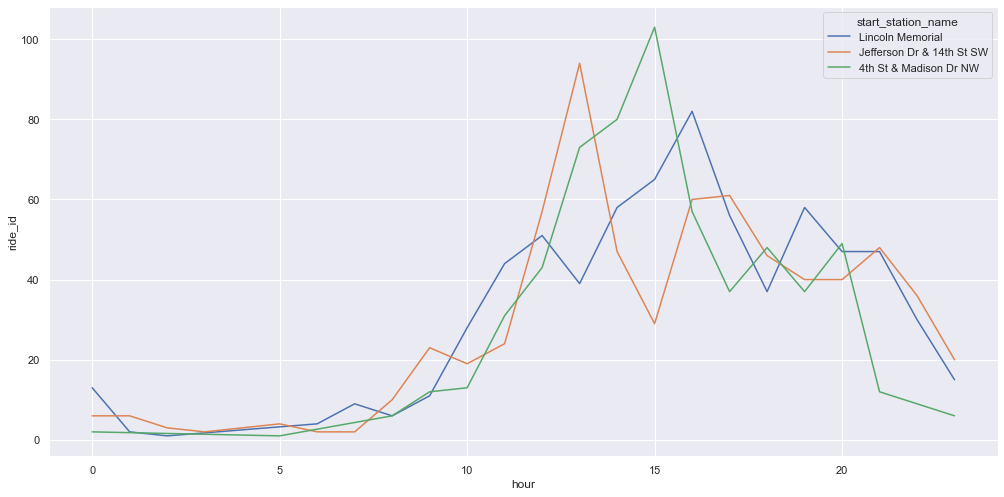

In [27]:
# Plotting top-5 stations rides vs time 

df_top = df.groupby(['hour', 'start_station_name']).count()['ride_id'].reset_index()

sns.lineplot(data=df_top, 
            x='hour', y='ride_id', hue='start_station_name', 
            hue_order= df.start_station_name.value_counts().iloc[:3].index)

#Lincoln Memorial                                         622
#Jefferson Dr & 14th St SW                                602
#4th St & Madison Dr NW                                   533
#Henry Bacon Dr & Lincoln Memorial Circle NW              526
#Smithsonian-National Mall / Jefferson Dr & 12th St SW    502

<AxesSubplot:xlabel='hour', ylabel='ride_id'>

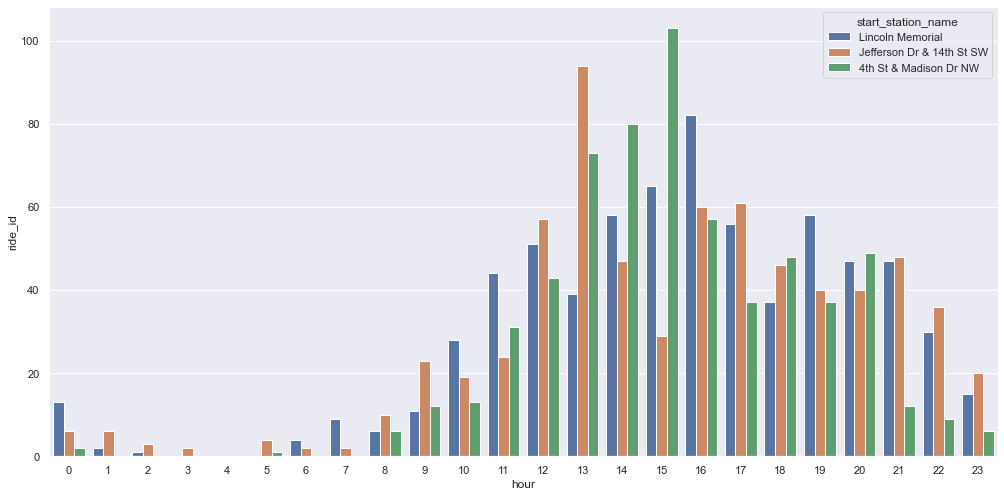

In [28]:
# BAR plot for top-5 stations rides vs time

sns.barplot(x='hour', y='ride_id', hue='start_station_name', data=df_top,  
            hue_order= df.start_station_name.value_counts().iloc[:3].index, dodge=True)

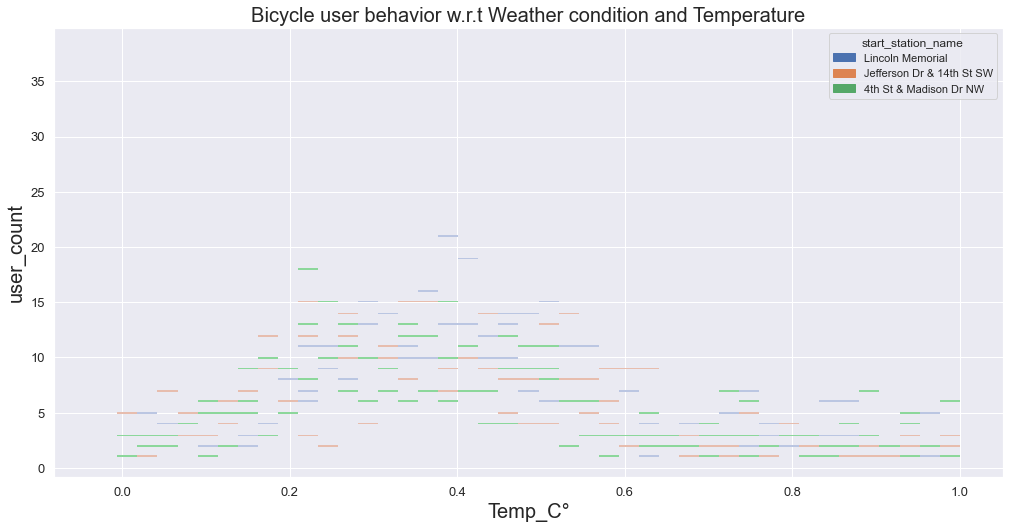

In [56]:

df_dur = df[df['duration_hr'] <= 1].groupby(['duration_hr', 'start_station_name']).count()['ride_id'].reset_index()

sns.histplot(data=df_dur, x="duration_hr", y='ride_id', hue="start_station_name", hue_order= df.start_station_name.value_counts().iloc[:3].index, multiple="dodge", shrink=1)
plt.title('Bicycle user behavior w.r.t Weather condition and Temperature', fontsize=20)
plt.xlabel('Temp_C°', fontsize=20)
plt.ylabel('user_count', fontsize=20)
plt.tick_params(labelsize=13)

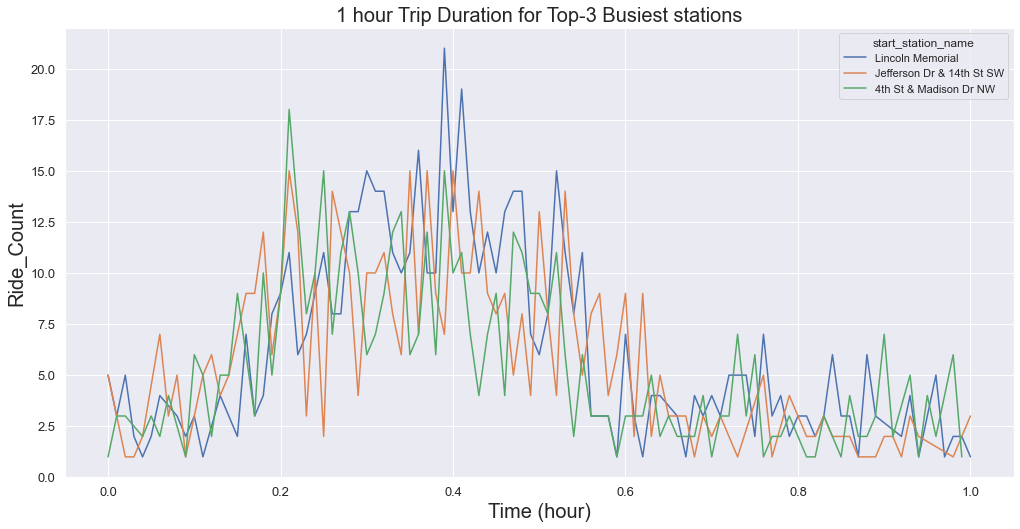

In [64]:
# Trip duration for top stations w.r.t no. of rides

df_dur = df[df['duration_hr'] <= 1].groupby(['duration_hr', 'start_station_name']).count()['ride_id'].reset_index()

sns.lineplot(data=df_dur, x='duration_hr', y='ride_id', hue='start_station_name', 
             hue_order= df.start_station_name.value_counts().iloc[:3].index)

plt.title('1 hour Trip Duration for Top-3 Busiest stations', fontsize=20)
plt.xlabel('Time (hour)', fontsize=20)
plt.ylabel('Ride_Count', fontsize=20)
plt.tick_params(labelsize=13)

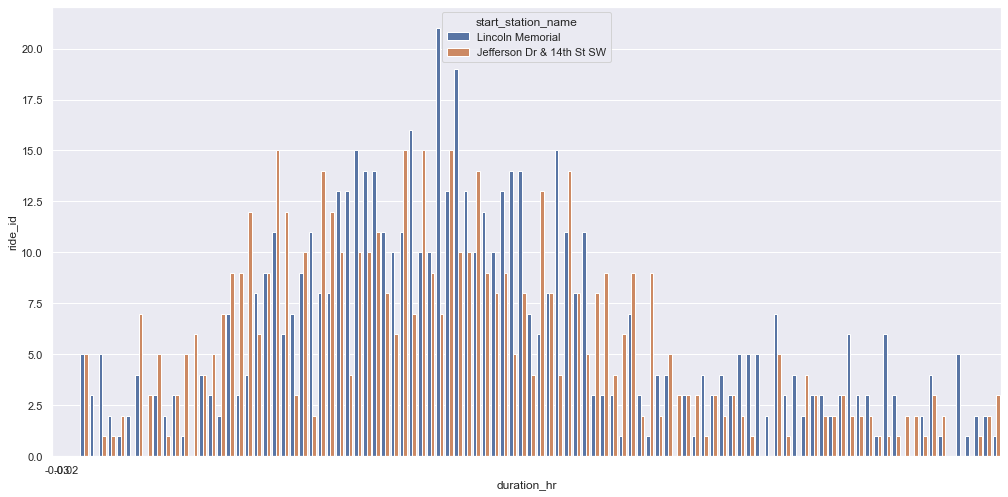

In [62]:
#fig, ax = plt.subplots(1,1)

sns.barplot(x='duration_hr', y='ride_id', hue='start_station_name', data=df_dur,  
            hue_order= df.start_station_name.value_counts().iloc[:2].index, dodge=True)

#axes = lm.axes
#axes.set_xlim(0,5)

#plt.xlim(0, 30)

#plt.xticks(df_dur['duration_hr'][::5])    # set here, ticks at step of 50
#plt.show()

plt.xticks([0,0.4,0.8,1.0]);

#plt.set_xticks(range(len(df_dur))) # <--- set the ticks first
#plt.set_xticklabels(['0.0','0.2','0.4','0.6','0.8','1.0'])

# Resampling
For controlling data visualisation w.r.t Time

In [31]:
df.loc[:, 'values'] = 1

In [32]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day,duration_hr,hour,DAY,weekday,values
started_at,,,,,,,,,,,,,,,,,,,
2021-06-21 00:03:31,0931020CA99DDDFD,electric_bike,2021-06-21 00:03:31,2021-06-21 00:51:47,M St & New Jersey Ave SE,31208.0,Columbia Rd & Belmont St NW,31113.0,38.876379,-77.003725,38.920646,-77.043541,casual,2021-06-21,0.80,0,21,Monday,1
2021-06-21 00:03:45,5FA282CD9203E4FD,classic_bike,2021-06-21 00:03:45,2021-06-21 00:22:24,15th St & Constitution Ave NW,31321.0,15th & W St NW,31125.0,38.892244,-77.033234,38.919018,-77.034449,member,2021-06-21,0.31,0,21,Monday,1
2021-06-21 00:04:05,4D5A3796796C3DE5,classic_bike,2021-06-21 00:04:05,2021-06-21 00:15:56,Georgetown Harbor / 30th St NW,31215.0,15th & L St NW,31276.0,38.902314,-77.059142,38.903649,-77.034918,casual,2021-06-21,0.20,0,21,Monday,1
2021-06-21 00:04:12,8C934856B972A8A1,classic_bike,2021-06-21 00:04:12,2021-06-21 00:14:04,15th St & Constitution Ave NW,31321.0,Jefferson Dr & 14th St SW,31247.0,38.892244,-77.033234,38.888553,-77.032427,casual,2021-06-21,0.16,0,21,Monday,1
2021-06-21 00:05:21,145F43324B2D30B9,classic_bike,2021-06-21 00:05:21,2021-06-21 00:12:55,3rd & Tingey St SE,31634.0,4th & E St SW,31244.0,38.875010,-77.002400,38.884120,-77.017445,member,2021-06-21,0.13,0,21,Monday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26 23:59:05,8FD3D47BBE46EB6A,classic_bike,2021-06-26 23:59:05,2021-06-27 00:09:18,11th & Kenyon St NW,31102.0,14th & Belmont St NW,31119.0,38.929464,-77.027822,38.921074,-77.031887,casual,2021-06-26,0.17,23,26,Saturday,1
2021-06-26 23:59:17,209B1878B4CF750A,classic_bike,2021-06-26 23:59:17,2021-06-27 00:22:25,7th & T St NW,31109.0,22nd & H St NW,31127.0,38.915500,-77.022200,38.898925,-77.048852,casual,2021-06-26,0.39,23,26,Saturday,1
2021-06-26 23:59:22,6B2425E9DCD624F9,classic_bike,2021-06-26 23:59:22,2021-06-27 00:18:58,17th & Corcoran St NW,31214.0,New Hampshire Ave & T St NW,31229.0,38.912100,-77.038700,38.915544,-77.038252,member,2021-06-26,0.33,23,26,Saturday,1


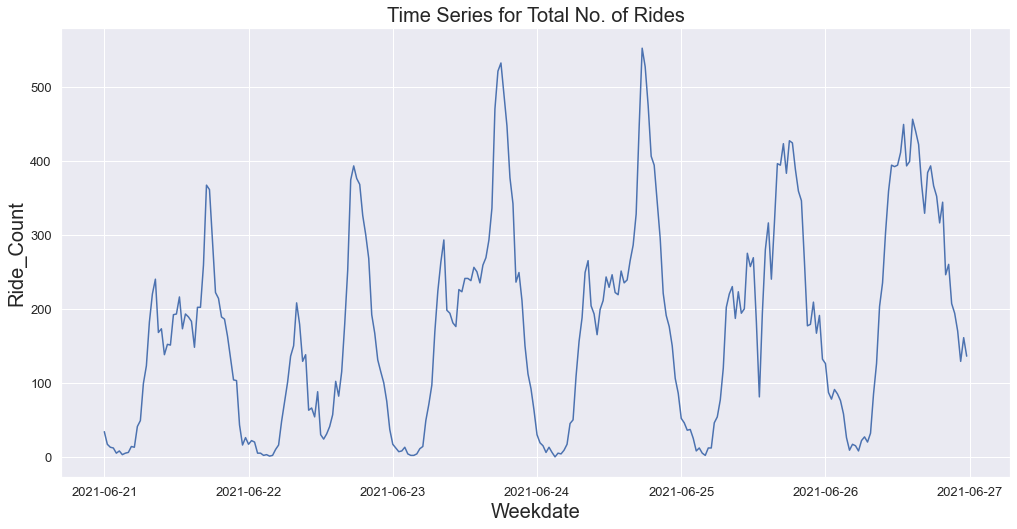

In [68]:
sns.lineplot(data=df.loc['2021-06-21':'2021-06-26'].resample('30T').count()['member_casual'])

plt.title('Time Series for Total No. of Rides', fontsize=20)
plt.xlabel('Weekdate', fontsize=20)
plt.ylabel('Ride_Count', fontsize=20)
plt.tick_params(labelsize=13)

In [34]:
df.loc['2021-06-21 6:00':'2021-06-22 12:00']

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day,duration_hr,hour,DAY,weekday,values
started_at,,,,,,,,,,,,,,,,,,,
2021-06-21 06:00:34,F9D4C7F5AC95D7CC,classic_bike,2021-06-21 06:00:34,2021-06-21 06:16:22,Lincoln Memorial,31258.0,8th & D St NW,31270.0,38.888255,-77.049436,38.894851,-77.023240,casual,2021-06-21,0.26,6,21,Monday,1
2021-06-21 06:01:04,A3D5A007DBCE65E2,classic_bike,2021-06-21 06:01:04,2021-06-21 06:05:18,15th St & Massachusetts Ave SE,31626.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.887320,-76.983569,38.884095,-76.995234,member,2021-06-21,0.07,6,21,Monday,1
2021-06-21 06:01:27,79BE4870A77009F9,classic_bike,2021-06-21 06:01:27,2021-06-21 06:58:42,Four Mile Run Dr & S Shirlington Rd,31057.0,Four Mile Run Dr & S Shirlington Rd,31057.0,38.844400,-77.085931,38.844400,-77.085931,member,2021-06-21,0.95,6,21,Monday,1
2021-06-21 06:03:27,12283401D5FBEABA,electric_bike,2021-06-21 06:03:27,2021-06-21 06:14:01,Tenleytown / Wisconsin Ave & Albemarle St NW,31303.0,American University East Campus,31320.0,38.947539,-77.079374,38.936340,-77.087159,member,2021-06-21,0.18,6,21,Monday,1
2021-06-21 06:04:03,7512C83076015B34,classic_bike,2021-06-21 06:04:03,2021-06-21 06:13:59,New Hampshire Ave & T St NW,31229.0,16th & Irving St NW,31122.0,38.915544,-77.038252,38.928893,-77.036250,member,2021-06-21,0.17,6,21,Monday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-22 11:59:49,B86B91887247636A,classic_bike,2021-06-22 11:59:49,2021-06-22 12:04:57,22nd & H St NW,31127.0,20th & L St NW,31250.0,38.898925,-77.048852,38.903584,-77.044789,member,2021-06-22,0.09,11,22,Tuesday,1
2021-06-22 11:59:54,A7B6A3B2F4FA8D51,classic_bike,2021-06-22 11:59:54,2021-06-22 12:05:31,7th & S St NW,31130.0,New Hampshire Ave & T St NW,31229.0,38.914204,-77.022175,38.915544,-77.038252,member,2021-06-22,0.09,11,22,Tuesday,1
2021-06-22 12:00:00,59AC741504769A4C,classic_bike,2021-06-22 12:00:00,2021-06-22 12:07:59,Kansas Ave & Longfellow St NW,31423.0,Georgia & Missouri Ave NW,31411.0,38.958098,-77.013821,38.961339,-77.027855,member,2021-06-22,0.13,12,22,Tuesday,1


# Key Performance Index (KPI)
1. Start station, End station, no. of rides and member/casual
2. Start station, End station, no. of rides, time of the day and member/casual
3. Start station, End station, no. of rides, day of the week and member/casual
4. Start station, End station, no. of rides, trip duration and member/casual
5. Start station, End station, no. of rides, time of the day, trip duration and member/casual
6. Start station, End station, no. of rides, capacity and member/casual
7. Start station, End station, no. of rides, capacity/station distribution and member/casual
8. Start station, End station, no. of rides, weather and time of the day
9. Start station, End station, no. of rides, weather, time of the day and weekday

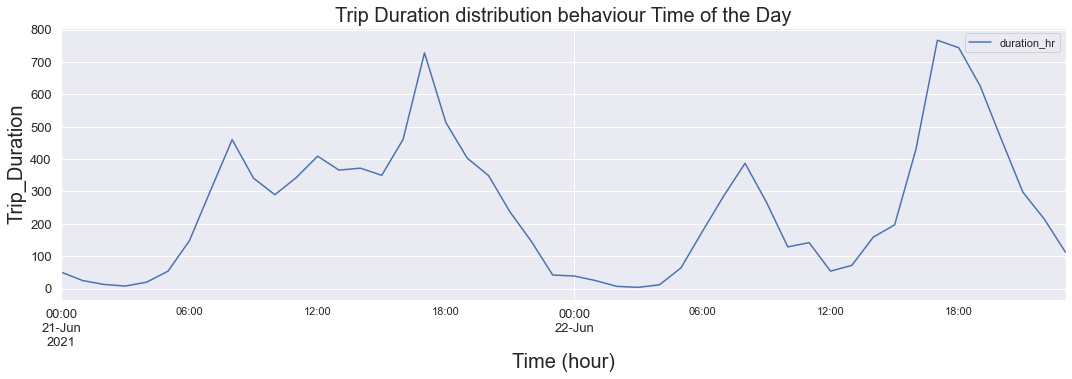

In [74]:
# Trip duration
# Counting no. of rides w.r.t trip duration

df[['duration_hr']].loc['2021-06-21' : '2021-06-22'].resample('1H').count().plot(figsize=(18,5))

plt.title('Trip Duration distribution behaviour Time of the Day', fontsize=20)
plt.xlabel('Time (hour)', fontsize=20)
plt.ylabel('Trip_Duration', fontsize=20)
plt.tick_params(labelsize=13)

In [38]:
df[df['duration_hr'] > 400]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day,duration_hr,hour,DAY,weekday,values
started_at,,,,,,,,,,,,,,,,,,,
2021-06-21 09:12:05,A48F79B5B4815F46,docked_bike,2021-06-21 09:12:05,2021-07-08 14:54:38,23rd & M St NW,31128.0,6035 Warehouse,32901.0,38.905303,-77.050264,38.963810,-77.010266,casual,2021-06-21,413.71,9,21,Monday,1
2021-06-22 01:08:01,05F41DC7D8C385F8,docked_bike,2021-06-22 01:08:01,2021-07-09 21:12:43,18th & New Hampshire Ave NW,31324.0,19th St & Constitution Ave NW,31235.0,38.911268,-77.041829,38.892300,-77.043600,casual,2021-06-22,428.08,1,22,Tuesday,1
2021-06-25 00:45:22,928DE66875A19F0E,docked_bike,2021-06-25 00:45:22,2021-07-11 21:29:50,10th & U St NW,31111.0,14th & Girard St NW,31123.0,38.917200,-77.025900,38.925284,-77.032375,casual,2021-06-25,404.74,0,25,Friday,1
2021-06-26 20:44:06,0CC75E45179654E9,docked_bike,2021-06-26 20:44:06,2021-07-13 14:40:36,Jefferson Memorial,31249.0,6035 Warehouse,32901.0,38.879819,-77.037413,38.963810,-77.010266,casual,2021-06-26,401.94,20,26,Saturday,1


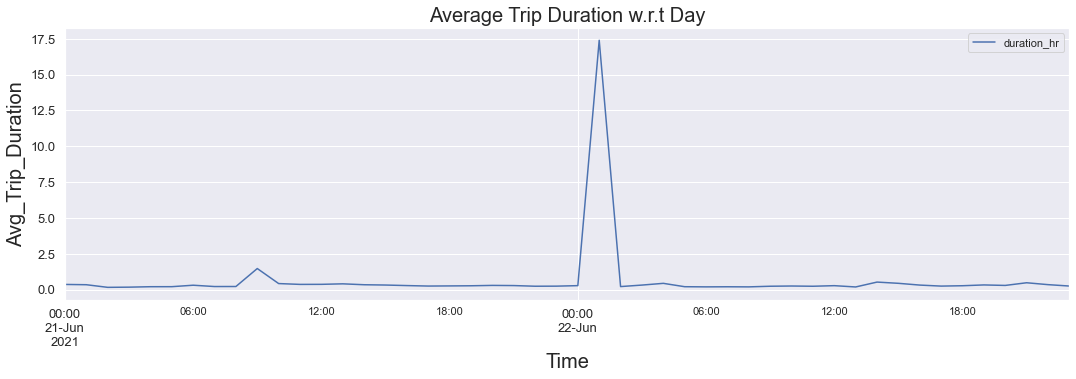

In [83]:
# Trip duration
# Average ride duration w.r.t trip duration

df[['duration_hr']].loc['2021-06-21' : '2021-06-22'].resample('1H').mean().plot(figsize=(18,5))

plt.title('Average Trip Duration w.r.t Day', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Avg_Trip_Duration', fontsize=20)
plt.tick_params(labelsize=13)

In [40]:
df[['duration_hr']].loc['2021-06-21' : '2021-06-21'].resample('2H').mean()

,duration_hr
started_at,
2021-06-21 00:00:00,0.355789
2021-06-21 02:00:00,0.164286
2021-06-21 04:00:00,0.205270
2021-06-21 06:00:00,0.245740
2021-06-21 08:00:00,0.751598
2021-06-21 10:00:00,0.391659
2021-06-21 12:00:00,0.385716
2021-06-21 14:00:00,0.330956
2021-06-21 16:00:00,0.262212


In [41]:
# DataFrame for Trip duration w.r.t Time of the day

#df_dur_hr = df[df['duration_hr'] <= 0.5].groupby(['hour', 'duration_hr', 'start_station_name']).count()['ride_id'].reset_index()
#df_dur_hr

In [92]:
# Finding Key Performance Indicator (KPI)
# DataFrame, frequently used stations trip duration for the rides
# Start station, End station, no. of rides, member/casual

df_kpi = df.groupby(['hour', 'start_station_name', 'end_station_name', 'member_casual', 'duration_hr', 'weekday']).count()['ride_id'].sort_values(ascending=False).reset_index()
df_kpi

,hour,start_station_name,end_station_name,member_casual,duration_hr,weekday,ride_id
0,14,Columbus Circle / Union Station,4th St & Madison Dr NW,casual,0.24,Monday,6
1,17,7th & F St NW / National Portrait Gallery,Constitution Ave & 2nd St NW/DOL,casual,0.49,Wednesday,5
2,22,California St & Florida Ave NW,18th St & Wyoming Ave NW,member,0.03,Monday,5
3,8,Virginia Ave & 25th St NW,14th & G St NW,member,0.16,Wednesday,5
4,22,Maine Ave & 7th St SW,Maine Ave & 9th St SW,member,0.02,Thursday,5
...,...,...,...,...,...,...,...
48629,13,15th & W St NW,13th & U St NW,casual,0.08,Thursday,1
48630,13,15th & W St NW,14th & Otis Pl NW,member,0.16,Saturday,1
48631,13,15th & W St NW,15th & P St NW,member,0.10,Saturday,1
48632,13,15th & W St NW,17th & Corcoran St NW,member,0.07,Saturday,1


In [96]:
# Finding Key Performance Indicator (KPI)
# Starting station equals to the end stations for max. no. of rides

df_kpi.loc[df_kpi['start_station_name'] == df_kpi['end_station_name'], :]


,hour,start_station_name,end_station_name,member_casual,duration_hr,weekday,ride_id
5,17,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,casual,0.31,Saturday,4
24,22,Lincoln Memorial,Lincoln Memorial,casual,0.34,Friday,3
27,22,19th & G St NW,19th & G St NW,member,0.01,Saturday,3
45,19,15th St & Constitution Ave NW,15th St & Constitution Ave NW,casual,0.36,Friday,3
57,14,3rd & H St NE,3rd & H St NE,casual,0.44,Friday,3
...,...,...,...,...,...,...,...
48557,13,15th & P St NW,15th & P St NW,member,0.32,Monday,1
48583,13,15th & K St NW,15th & K St NW,casual,1.12,Monday,1
48592,13,15th St & Constitution Ave NW,15th St & Constitution Ave NW,casual,0.00,Saturday,1
48593,13,15th St & Constitution Ave NW,15th St & Constitution Ave NW,casual,0.40,Thursday,1


In [98]:
temp = df_kpi.groupby(['start_station_name', 'end_station_name', 'member_casual']).count()['ride_id'].sort_values(ascending=False).reset_index()
temp

,start_station_name,end_station_name,member_casual,ride_id
0,Jefferson Dr & 14th St SW,Jefferson Dr & 14th St SW,casual,150
1,Smithsonian-National Mall / Jefferson Dr & 12t...,Smithsonian-National Mall / Jefferson Dr & 12t...,casual,114
2,4th St & Madison Dr NW,4th St & Madison Dr NW,casual,77
3,Lincoln Memorial,Lincoln Memorial,casual,71
4,17th St & Independence Ave SW,17th St & Independence Ave SW,casual,70
...,...,...,...,...
25923,4th & W St NE,Edgewood Rec Center,member,1
25924,4th & W St NE,Eastern Market Metro / Pennsylvania Ave & 8th ...,casual,1
25925,4th & W St NE,Division Ave & Foote St NE,casual,1
25926,4th & W St NE,Columbia Rd & Georgia Ave NW,member,1


In [110]:
temp_a= temp[(temp['start_station_name'] == temp['end_station_name']) & (temp['member_casual'] == 'casual')].sort_values(by=['ride_id'], ascending=False).reset_index()
temp_a

,index,start_station_name,end_station_name,member_casual,ride_id
0,0,Jefferson Dr & 14th St SW,Jefferson Dr & 14th St SW,casual,150
1,1,Smithsonian-National Mall / Jefferson Dr & 12t...,Smithsonian-National Mall / Jefferson Dr & 12t...,casual,114
2,2,4th St & Madison Dr NW,4th St & Madison Dr NW,casual,77
3,3,Lincoln Memorial,Lincoln Memorial,casual,71
4,4,17th St & Independence Ave SW,17th St & Independence Ave SW,casual,70
...,...,...,...,...,...
450,12689,N Howard St & Taney Ave,N Howard St & Taney Ave,casual,1
451,12655,Montgomery College / W Campus Dr & Mannakee St,Montgomery College / W Campus Dr & Mannakee St,casual,1
452,12653,Montgomery Ave & Waverly St,Montgomery Ave & Waverly St,casual,1
453,12599,Washington Blvd & N Frederick St,Washington Blvd & N Frederick St,casual,1


In [111]:
temp_a1= temp[(temp['start_station_name'] == temp['end_station_name']) & (temp['member_casual'] == 'member')].sort_values(by=['ride_id'], ascending=False).reset_index()
temp_a1

,index,start_station_name,end_station_name,member_casual,ride_id
0,8,Jefferson Dr & 14th St SW,Lincoln Memorial,casual,53
1,10,Lincoln Memorial,Jefferson Memorial,casual,50
2,11,Smithsonian-National Mall / Jefferson Dr & 12t...,Jefferson Dr & 14th St SW,casual,44
3,14,4th St & Madison Dr NW,Jefferson Dr & 14th St SW,casual,40
4,15,4th St & Madison Dr NW,Henry Bacon Dr & Lincoln Memorial Circle NW,casual,35
...,...,...,...,...,...
10401,15069,Tenleytown / Wisconsin Ave & Albemarle St NW,Connecticut & Nebraska Ave NW,casual,1
10402,15068,John McCormack Dr & Michigan Ave NE,Hamlin & 7th St NE,casual,1
10403,15066,John McCormack Dr & Michigan Ave NE,Edgewood Rec Center,casual,1
10404,15065,Tenleytown / Wisconsin Ave & Albemarle St NW,Connecticut Ave & McKinley St NW,casual,1


In [95]:
a= df_kpi.loc[df_kpi['start_station_name'] == df_kpi['end_station_name'], :].groupby(['member_casual']).sum()['ride_id']
a

member_casual
casual    3079
member    1083
Name: ride_id, dtype: int64

In [45]:
type(a)

pandas.core.series.Series

<AxesSubplot:xlabel='member_casual'>

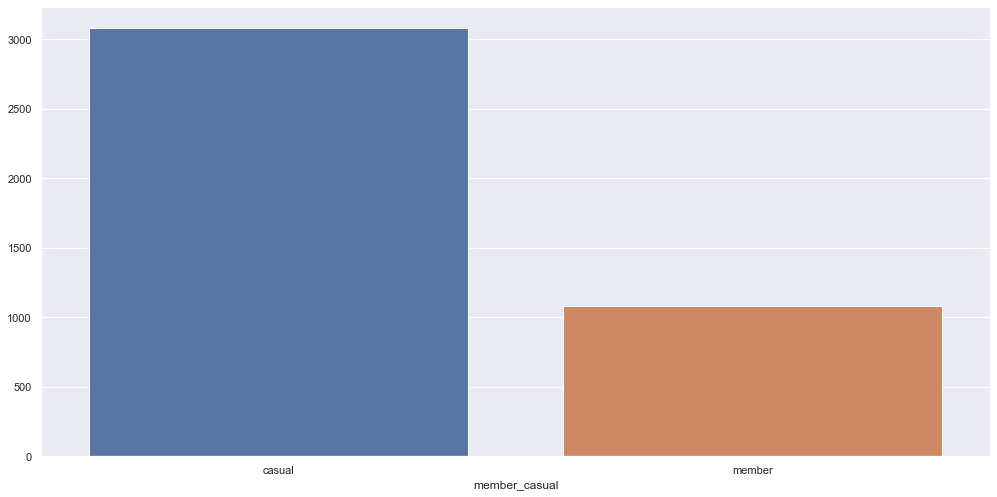

In [46]:
# Plotting 
sns.barplot(x=a.index, y=a.values)

In [47]:
# Finding Key Performance Indicator (KPI)
# Starting station is not the same as the end stations

df_kpi.loc[df_kpi['start_station_name'] != df_kpi['end_station_name'], :]

,hour,start_station_name,end_station_name,member_casual,duration_hr,weekday,ride_id
0,14,Columbus Circle / Union Station,4th St & Madison Dr NW,casual,0.24,Monday,6
1,17,7th & F St NW / National Portrait Gallery,Constitution Ave & 2nd St NW/DOL,casual,0.49,Wednesday,5
2,22,California St & Florida Ave NW,18th St & Wyoming Ave NW,member,0.03,Monday,5
3,8,Virginia Ave & 25th St NW,14th & G St NW,member,0.16,Wednesday,5
4,22,Maine Ave & 7th St SW,Maine Ave & 9th St SW,member,0.02,Thursday,5
...,...,...,...,...,...,...,...
48629,13,15th & W St NW,13th & U St NW,casual,0.08,Thursday,1
48630,13,15th & W St NW,14th & Otis Pl NW,member,0.16,Saturday,1
48631,13,15th & W St NW,15th & P St NW,member,0.10,Saturday,1
48632,13,15th & W St NW,17th & Corcoran St NW,member,0.07,Saturday,1


In [48]:
b= df_kpi.loc[df_kpi['start_station_name'] != df_kpi['end_station_name'], :].groupby(['member_casual']).sum()['ride_id']
b

member_casual
casual    19161
member    27302
Name: ride_id, dtype: int64

In [49]:
df_kpi = df.groupby(['hour', 'start_station_name', 'end_station_name', 'member_casual', 'duration_hr', 'weekday']).count()['ride_id'].sort_values(ascending=False).reset_index()

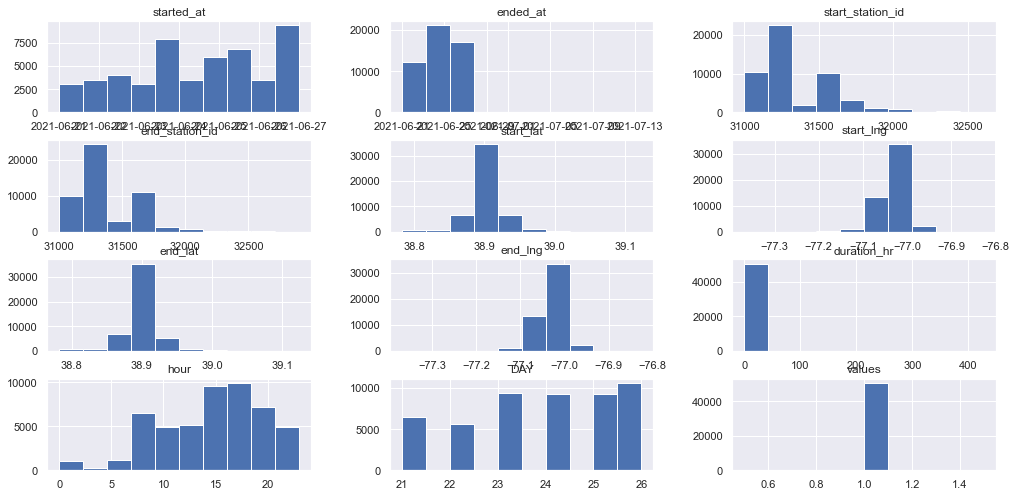

In [50]:
df.hist();